<a href="https://colab.research.google.com/github/VishnukantMULE/5_GrievanceHandlingSystem/blob/master/conditional_detr_50_signature_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers

## Local Inference on GPU
Model page: https://huggingface.co/tech4humans/conditional-detr-50-signature-detector

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/tech4humans/conditional-detr-50-signature-detector)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="tech4humans/conditional-detr-50-signature-detector")

In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForObjectDetection

processor = AutoImageProcessor.from_pretrained("tech4humans/conditional-detr-50-signature-detector")
model = AutoModelForObjectDetection.from_pretrained("tech4humans/conditional-detr-50-signature-detector")

In [2]:

# Signature Detection using Conditional DETR Model
# Colab Notebook Code

# Install required packages
!pip install transformers pillow torch torchvision --quiet

# Import necessary libraries
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
from google.colab import files
import io
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


Please upload an image file:


Saving a_1_1.jpg to a_1_1.jpg


In [10]:
# Upload image file
print("Please upload an image file:")
uploaded = files.upload()
# Get the uploaded file
if uploaded:
    file_name = list(uploaded.keys())[0]
    print(f"Processing file: {file_name}")

    # Load and display original image
    image = Image.open(io.BytesIO(uploaded[file_name])).convert("RGB")

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    print(f"Image size: {image.size}")
    print("Loading model and processor...")

    # Load the model and processor
    try:
        processor = AutoImageProcessor.from_pretrained("tech4humans/conditional-detr-50-signature-detector")
        model = AutoModelForObjectDetection.from_pretrained("tech4humans/conditional-detr-50-signature-detector")
        print("Model loaded successfully!")

        # Process the image
        inputs = processor(images=image, return_tensors="pt")

        # Run inference
        with torch.no_grad():
            outputs = model(**inputs)

        # Post-process results
        target_sizes = torch.tensor([image.size[::-1]])  # height, width format
        results = processor.post_process_object_detection(
            outputs,
            target_sizes=target_sizes,
            threshold=0.3  # Lower threshold to catch more signatures
        )[0]

        print(f"Number of detections: {len(results['scores'])}")

        # Create a copy of the image for drawing
        result_image = image.copy()
        draw = ImageDraw.Draw(result_image)

        # Draw bounding boxes and labels
        for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
            box = [round(i, 2) for i in box.tolist()]
            confidence = score.item()
            label_name = model.config.id2label[label.item()]

            print(f"Detection {i+1}: {label_name} (confidence: {confidence:.3f})")
            print(f"  Bounding box: {box}")

            # Draw rectangle
            draw.rectangle(box, outline="red", width=3)

            # Draw label with background
            text = f"{label_name}: {confidence:.2f}"

            # Calculate text size for background
            try:
                # Try to use a default font
                font = ImageFont.load_default()
                bbox = draw.textbbox((0, 0), text, font=font)
                text_width = bbox[2] - bbox[0]
                text_height = bbox[3] - bbox[1]
            except:
                # Fallback if font loading fails
                text_width = len(text) * 6
                text_height = 12

            # Draw background rectangle for text
            draw.rectangle(
                [box[0], box[1] - text_height - 4, box[0] + text_width + 4, box[1]],
                fill="red"
            )

            # Draw text
            draw.text((box[0] + 2, box[1] - text_height - 2), text, fill="white")

        # Display the result
        plt.subplot(1, 2, 2)
        plt.imshow(result_image)
        plt.title(f"Detected Signatures ({len(results['scores'])} found)")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Save the result image
        result_image.save("signature_detection_result.jpg")
        print("\nResult saved as 'signature_detection_result.jpg'")

        # Download the result
        files.download("signature_detection_result.jpg")

        if len(results['scores']) == 0:
            print("\nNo signatures detected. Try:")
            print("- Using an image with clearer signatures")
            print("- Lowering the confidence threshold")
            print("- Ensuring the image has good contrast")
        else:
            print(f"\nSuccessfully detected {len(results['scores'])} signature(s)!")

    except Exception as e:
        print(f"Error loading model or processing image: {str(e)}")
        print("Please check your internet connection and try again.")

else:
    print("No file uploaded. Please run the cell again and select an image file.")

Please upload an image file:


No file uploaded. Please run the cell again and select an image file.


In [13]:
!pip install transformers pillow torch torchvision --quiet

import os
import zipfile
import io
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from google.colab import files

Please upload an image file:


Saving a_6_2.jpg to a_6_2 (2).jpg
Processing file: a_6_2 (2).jpg
Image size: (2480, 1840)
Loading model and processor...
Model loaded successfully!
Number of detections: 1
Detection 1: signature (confidence: 0.307)
  Bounding box: [1778.68, 1442.78, 2013.45, 1660.43]

Cropped 1 signature(s):
  Signature 1: (255, 238) pixels, saved as cropped_signatures/signature_1_conf_0.31.jpg


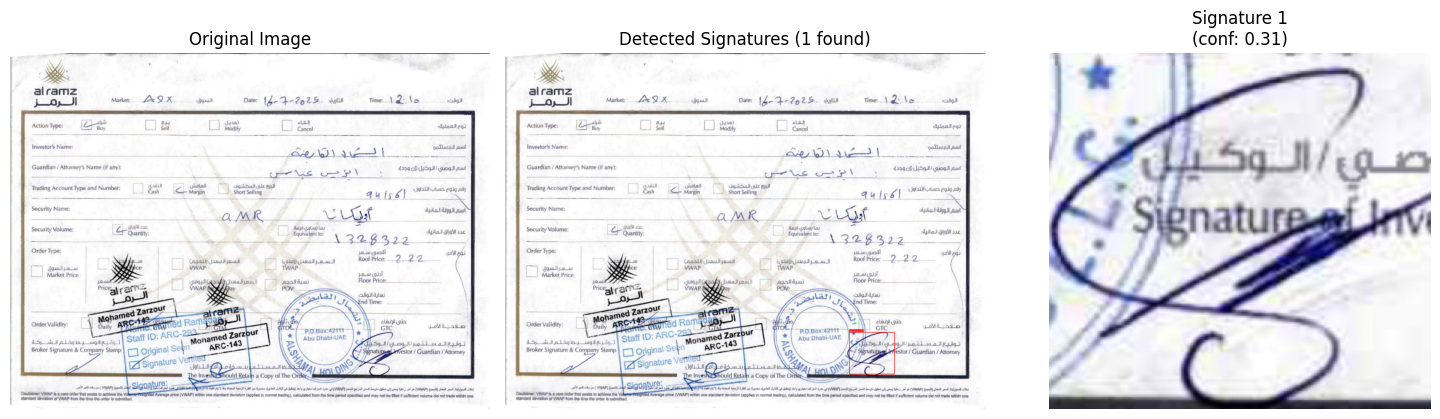


Result saved as 'signature_detection_result.jpg'
Created zip file: cropped_signatures.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Individual files available for download:
  - cropped_signatures/signature_1_conf_0.31.jpg

✓ Successfully detected and cropped 1 signature(s)!
✓ All cropped signatures saved in 'cropped_signatures' folder
✓ Zip file downloaded with all results

Enhanced helper function 'process_and_crop_signatures()' is now available!


In [14]:

# Upload image file
print("Please upload an image file:")
uploaded = files.upload()

# Get the uploaded file
if uploaded:
    file_name = list(uploaded.keys())[0]
    print(f"Processing file: {file_name}")

    # Load and display original image
    image = Image.open(io.BytesIO(uploaded[file_name])).convert("RGB")

    plt.figure(figsize=(15, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    print(f"Image size: {image.size}")
    print("Loading model and processor...")

    # Load the model and processor
    try:
        processor = AutoImageProcessor.from_pretrained("tech4humans/conditional-detr-50-signature-detector")
        model = AutoModelForObjectDetection.from_pretrained("tech4humans/conditional-detr-50-signature-detector")
        print("Model loaded successfully!")

        # Process the image
        inputs = processor(images=image, return_tensors="pt")

        # Run inference
        with torch.no_grad():
            outputs = model(**inputs)

        # Post-process results
        target_sizes = torch.tensor([image.size[::-1]])  # height, width format
        results = processor.post_process_object_detection(
            outputs,
            target_sizes=target_sizes,
            threshold=0.3  # Lower threshold to catch more signatures
        )[0]

        print(f"Number of detections: {len(results['scores'])}")

        # Create a copy of the image for drawing
        result_image = image.copy()
        draw = ImageDraw.Draw(result_image)

        # Store cropped signatures and their info
        cropped_signatures = []
        signature_info = []

        # Create directory for cropped signatures
        if not os.path.exists("cropped_signatures"):
            os.makedirs("cropped_signatures")

        # Draw bounding boxes and crop signatures
        for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
            box = [round(i, 2) for i in box.tolist()]
            confidence = score.item()
            label_name = model.config.id2label[label.item()]

            print(f"Detection {i+1}: {label_name} (confidence: {confidence:.3f})")
            print(f"  Bounding box: {box}")

            # Draw rectangle on result image
            draw.rectangle(box, outline="red", width=3)

            # Draw label with background
            text = f"{label_name}: {confidence:.2f}"

            # Calculate text size for background
            try:
                font = ImageFont.load_default()
                bbox = draw.textbbox((0, 0), text, font=font)
                text_width = bbox[2] - bbox[0]
                text_height = bbox[3] - bbox[1]
            except:
                text_width = len(text) * 6
                text_height = 12

            # Draw background rectangle for text
            draw.rectangle(
                [box[0], box[1] - text_height - 4, box[0] + text_width + 4, box[1]],
                fill="red"
            )

            # Draw text
            draw.text((box[0] + 2, box[1] - text_height - 2), text, fill="white")

            # Crop the signature with some padding
            padding = 10  # Add padding around the signature
            crop_box = [
                max(0, int(box[0] - padding)),
                max(0, int(box[1] - padding)),
                min(image.size[0], int(box[2] + padding)),
                min(image.size[1], int(box[3] + padding))
            ]

            # Crop the signature
            cropped_signature = image.crop(crop_box)
            cropped_signatures.append(cropped_signature)

            # Save individual cropped signature
            crop_filename = f"cropped_signatures/signature_{i+1}_conf_{confidence:.2f}.jpg"
            cropped_signature.save(crop_filename)

            # Store signature info
            signature_info.append({
                'index': i + 1,
                'label': label_name,
                'confidence': confidence,
                'original_bbox': box,
                'crop_bbox': crop_box,
                'filename': crop_filename,
                'size': cropped_signature.size
            })

        # Display the result with detections
        plt.subplot(2, 3, 2)
        plt.imshow(result_image)
        plt.title(f"Detected Signatures ({len(results['scores'])} found)")
        plt.axis('off')

        # Display cropped signatures
        if cropped_signatures:
            print(f"\nCropped {len(cropped_signatures)} signature(s):")

            # Calculate subplot layout for cropped signatures
            n_crops = len(cropped_signatures)
            if n_crops <= 4:
                # Show cropped signatures in the same figure
                for i, (cropped_sig, info) in enumerate(zip(cropped_signatures, signature_info)):
                    plt.subplot(2, 3, 3 + i)
                    plt.imshow(cropped_sig)
                    plt.title(f"Signature {info['index']}\n(conf: {info['confidence']:.2f})")
                    plt.axis('off')
                    print(f"  Signature {info['index']}: {info['size']} pixels, saved as {info['filename']}")
            else:
                # Create separate figure for many signatures
                fig2, axes = plt.subplots(2, (n_crops + 1) // 2, figsize=(15, 6))
                axes = axes.flatten() if n_crops > 2 else [axes] if n_crops == 1 else axes

                for i, (cropped_sig, info) in enumerate(zip(cropped_signatures, signature_info)):
                    axes[i].imshow(cropped_sig)
                    axes[i].set_title(f"Signature {info['index']} (conf: {info['confidence']:.2f})")
                    axes[i].axis('off')
                    print(f"  Signature {info['index']}: {info['size']} pixels, saved as {info['filename']}")

                # Hide unused subplots
                for j in range(i + 1, len(axes)):
                    axes[j].axis('off')

                plt.tight_layout()
                plt.show()

        plt.tight_layout()
        plt.show()

        # Save the result image with detections
        result_image.save("signature_detection_result.jpg")
        print(f"\nResult saved as 'signature_detection_result.jpg'")

        # Create a zip file with all cropped signatures
        if cropped_signatures:
            zip_filename = "cropped_signatures.zip"
            with zipfile.ZipFile(zip_filename, 'w') as zipf:
                for info in signature_info:
                    zipf.write(info['filename'], os.path.basename(info['filename']))
                # Also add the main result image
                zipf.write("signature_detection_result.jpg", "signature_detection_result.jpg")

            print(f"Created zip file: {zip_filename}")

            # Download the zip file
            files.download(zip_filename)

            # Also download individual files if user wants
            print("\nIndividual files available for download:")
            for info in signature_info:
                print(f"  - {info['filename']}")

        # Summary
        if len(results['scores']) == 0:
            print("\nNo signatures detected. Try:")
            print("- Using an image with clearer signatures")
            print("- Lowering the confidence threshold")
            print("- Ensuring the image has good contrast")
        else:
            print(f"\n✓ Successfully detected and cropped {len(results['scores'])} signature(s)!")
            print(f"✓ All cropped signatures saved in 'cropped_signatures' folder")
            print(f"✓ Zip file downloaded with all results")

    except Exception as e:
        print(f"Error loading model or processing image: {str(e)}")
        print("Please check your internet connection and try again.")

else:
    print("No file uploaded. Please run the cell again and select an image file.")

# Enhanced helper function for batch processing with cropping
def process_and_crop_signatures(image_path_or_pil, threshold=0.3, padding=10, save_crops=True):
    """
    Process a single image for signature detection and crop signatures

    Args:
        image_path_or_pil: Either a file path (string) or PIL Image object
        threshold: Confidence threshold for detections (0.0 to 1.0)
        padding: Pixels to add around each cropped signature
        save_crops: Whether to save cropped signatures to files

    Returns:
        Dictionary with original image, result image, cropped signatures, and info
    """

    # Load image if path is provided
    if isinstance(image_path_or_pil, str):
        image = Image.open(image_path_or_pil).convert("RGB")
    else:
        image = image_path_or_pil.convert("RGB")

    # Process the image
    inputs = processor(images=image, return_tensors="pt")

    # Run inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Post-process results
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(
        outputs,
        target_sizes=target_sizes,
        threshold=threshold
    )[0]

    # Create result image with bounding boxes
    result_image = image.copy()
    draw = ImageDraw.Draw(result_image)

    cropped_signatures = []
    detections_info = []

    for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
        box = [round(i, 2) for i in box.tolist()]
        confidence = score.item()
        label_name = model.config.id2label[label.item()]

        # Draw rectangle and label
        draw.rectangle(box, outline="red", width=3)
        text = f"{label_name}: {confidence:.2f}"
        draw.text((box[0], box[1] - 15), text, fill="red")

        # Crop signature with padding
        crop_box = [
            max(0, int(box[0] - padding)),
            max(0, int(box[1] - padding)),
            min(image.size[0], int(box[2] + padding)),
            min(image.size[1], int(box[3] + padding))
        ]

        cropped_signature = image.crop(crop_box)
        cropped_signatures.append(cropped_signature)

        # Save if requested
        if save_crops:
            if not os.path.exists("batch_cropped"):
                os.makedirs("batch_cropped")
            crop_filename = f"batch_cropped/signature_{i+1}_conf_{confidence:.2f}.jpg"
            cropped_signature.save(crop_filename)
        else:
            crop_filename = None

        detections_info.append({
            'index': i + 1,
            'label': label_name,
            'confidence': confidence,
            'original_bbox': box,
            'crop_bbox': crop_box,
            'filename': crop_filename,
            'cropped_image': cropped_signature
        })

    return {
        'original_image': image,
        'result_image': result_image,
        'cropped_signatures': cropped_signatures,
        'detections_info': detections_info,
        'num_detections': len(results['scores'])
    }

print("\nEnhanced helper function 'process_and_crop_signatures()' is now available!")
